# Seminar 20
# Interior point method

## Reminder

- Projected gradient descent
- Frank-Wolfe method

## Convex optimization problem with equality constraints

\begin{equation*}
\begin{split}
&\min f(x) \\ 
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
where $f$ is convex and twice differentiable, $A \in \mathbb{R}^{p \times n}$ and $\mathrm{rank} \; A = p < n$

### Dual problem
Relation between dual and conjugate functions 
\begin{equation*}
\begin{split}
g(\mu) &  = -b^{\top}\mu + \inf_x(f(x) + \mu^{\top}Ax) \\
& = -b^{\top}\mu - \sup_x((-A^{\top}\mu)^{\top}x -f(x)) \\
& = -b^{\top}\mu - f^*(-A^{\top}\mu)
\end{split}
\end{equation*}

Dual problem

$$
\max_\mu -b^{\top}\mu - f^*(-A^{\top}\mu)
$$

**Approach 1**: find conjugate function and 

solve unconstrained optimization problem

**Issues**
- it may be not so easy to find solution of the primal problem from the dual one
- conjugate function $f^*$ has to be twice differentiable for fast solving of dual problem, but this is not always hold

### Optimality conditions

- $Ax^* = b$
- $f'(x^*) + A^{\top}\mu^* = 0$

or

$$ \begin{bmatrix} f' & A^{\top} \\ A & 0 \end{bmatrix} \begin{bmatrix} x^{\\*} \\ \mu^{\\*} \end{bmatrix} = \begin{bmatrix} 0 \\ b \end{bmatrix} $$

**Approach 2**: solve generally non-linear system with Newton method.

**Q**: in what case the system becomes linear?

## Newton method for convex optimization problem with equality constraints

\begin{equation*}
\begin{split}
& \min_v f(x) + f'(x)^{\top}v + \frac{1}{2}v^{\top}f''(x)v\\
\text{s.t. } & A(x + v) = b
\end{split}
\end{equation*}

From the optimality condition follows 

$$ \begin{bmatrix} f''(x) & A^{\top} \\ A & 0 \end{bmatrix} \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix} -f'(x) \\ 0 \end{bmatrix} $$

**Newton direction $v$ is defined only for non-singular matrix!**

**Q:** how direction $w$ can be interpreted?

**Exercise**. 

Estimate number of iterations required for convergence of 

Newton method for quadratic objective and linear equality constraints.

### Linearization of optimality conditions

- $A(x + v) = b \rightarrow Av = 0$
- $f'(x + v) + A^{\top}w \approx f'(x) + f''(x)v + A^{\top}w = 0$

or

- $f''(x)v + A^{\top}w = -f'(x)$

### Pseudocode
**Important note:** initial point has to lie inside the feasible set!

```python
def NewtonEqualityFeasible(f, gradf, hessf, A, b, 
                           
                           stop_crit, line_search, x0, 
                           
                           tol):
    
    x = x0
    
    n = x.shape[0]
    
    while True:
        
        newton_matrix = [[hessf(x), A.T], [A, 0]]
        
        rhs = [-gradf(x), 0]
        
        w = solve_lin_sys(newton_matrix, rhs)
        
        h = w[:n]
        
        if stop_crit(x, h, gradf(x), **kwargs) < tol:
            
            break
            
        alpha = line_search(x, h, f, gradf(x), **kwargs)
        
        x = x + alpha * h
        
    return x

```

### Stopping criterion

Estimate the following difference

$$
f(x) - \inf_v(\hat{f}(x + v) \; | \; A(x+v) = b),
$$

where $\hat{f}$ is quadratic approximation of function $f$.

To do this multiply both side by $h^{\top}$ from the left 

$$
\langle h^{\top} \rvert \cdot \quad f''(x)h + A^{\top}w = -f'(x)
$$

and use constraint $Ah = 0$

$$
h^{\top}f''(x)h = -f'(x)^{\top}h
$$

Then 

$$
\inf_v(\hat{f}(x + v) \; | \; A(x+v) = b) = f(x) - \frac{1}{2}h^{\top}f''(x)h
$$

**Summary:** value of $h^{\top}f''(x)h$ is the most natural stopping criterion of Newton method.

### Convergence theorem

Convergence of the equality constrained Newton method is equivalent 

to convergence classical Newton method for unconstrained optimization problem.

**Theorem**
Assume the following conditions hold
- level set $S = \{ x \; | \; x \in D(f), \; f(x) \leq f(x_0), \; Ax = b \}$ is closed and $x_0 \in D(f), \; Ax_0 = b$
- for any $x \in S$ and $\tilde{x} \in S$ hessian $f''(x)$ is Lipschitz
- in the set $S$ $\|f''(x)\|_2 \leq M $ and norm of the inverse matrix of the KKT system is bounded above

Then, Newton method converges to the pair $(x^*, \mu^*)$ 

- linearly when iterands far from the solution
- quadratically in sufficiently small neighbourhood of the solution

## Infeasible starting point

- Newton method requires that starting point is feasible
- But what to do if this requirement is violated? Example of hard case is the problem in which domain of the objective function is not $\mathbb{R}^n$.
- Assume starting point is infeasible, then KKT conditions can be written as

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = -
\begin{bmatrix}
f'(x)\\
{\color{red}{Ax - b}}
\end{bmatrix}
$$

- If $x$ is feasible, then the system is equivalent to the system for Newton method with feasible starting point

### Primal-dual interpretation

- Method is called *primal-dual*, if every iteration updates both primal and dual variables
- In particular, re-write optimality condition in the following form

$$
r(x^*, \mu^*) = (r_p(x^*, \mu^*), r_d(x^*, \mu^*)) = 0,
$$

where $r_p(x, \mu) = Ax - b$ and $r_d(x, \mu) = f'(x) + A^{\top}\mu$
- Solve system with Newton method:

$$
r(y + z) \approx r(y) + Dr(y)z = 0
$$

- Primal-dual direction in Newton method is defined as the solution of the following system

$$
Dr(y)z = -r(y)
$$

or more detailed

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d
\end{bmatrix}
 = -
\begin{bmatrix}
r_p(x, \mu)\\
r_d(x, \mu)
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x) + A^{\top}\mu\\
Ax - b
\end{bmatrix}
$$

- Replace $z_d^+ = \mu + z_d$ and obtain

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d^+
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x)\\
Ax - b
\end{bmatrix}
$$

- This system is equivalent to the previous one in the following notation

$$
v = z_p \qquad w = z_d^+ = \mu + z_d 
$$

- Newton method gives direction for update primal variable and updated value for dual variable

### Pseudocode
```python
def NewtonEqualityInfeasible(f, grad, hessf, A, b, 
                             
                             stop_crit, line_search, x0, 
                             
                             mu0, tol):
    
    x = x0
    
    mu = mu0
    
    n = x.shape[0]
    
    while True:
        
        z_p, z_d = ComputeNewtonStep(hessf(x), A, b)
        
        if stop_crit(x, z_p, z_d, grad(x), **kwargs) < tol:
            
            break
            
        alpha = line_search(x, z_p, z_d, 
                            
                            f, grad(x), **kwargs)
        
        x = x + alpha * z_p
        
        mu = mu + alpha * z_d
        
    return x
```

### Stopping criterion and backtracking

- Update $r_p$ after step $z_p$

$$
A(x + \alpha z_p) - b = [A(x + z_p) = b] = Ax + \alpha(b - Ax) - b = (1 - \alpha)(Ax - b)
$$

- Total update after $k$ steps

$$
r^{(k)} = \prod_{i=0}^{k-1}(1 - \alpha^{(i)})r^{(0)}
$$

- Stopping criterion: $Ax = b$ and $\|r(x, \mu)\|_2 \leq \varepsilon$

- Backtracking: $c \in (0, 1/2)$, $\beta = (0, 1)$
```python
def linesearch(r, x, mu, z_p, z_d, c, beta):
    alpha = 1
    while norm(r(x + alpha * z_p, mu + alpha * z_d)) >= 
    (1 - c * alpha) * norm(r(x, mu)): 
        alpha *= beta   
    return alpha
```

### Convergence theorem

The theorem result is similar to the case of feasible starting point

**Theorem.** Assume that
- sublevel set $S = \{(x, \mu) \; | \; x \in D(f), \; \| r(x, \mu) \|_2 \leq \| r(x_0, \mu_0)  \|_2 \}$ is closed
- in the set $S$ norm of the inverse KKT matrix is bounded
- hessian is Lipschitz in $S$.

Then convergence is 
- linear far from the solution and
- quadratic in the sufficiently small neighbourhood.

## General convex optimization problem

\begin{equation*}
\begin{split}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i (x) \leq 0 \qquad i=1,\ldots,m\\
& Ax = b,
\end{split}
\end{equation*}
where $f_i$ are convex and twice smoothly differentiable, $A \in \mathbb{R}^{p \times n}$ and $\mathrm{rank} \; A = p < n$. 

Assume that the problem is strictly feasible, i.e. Slater conditions are satisfied.

## Optimality conditions

- Primal feasibility

$$
Ax^* = b, \; f_i(x^*) \leq 0, \; i = 1,\ldots,m
$$

- Dual feasibility

$$
\lambda^* \geq 0
$$

- Lagrangian stationarity

$$
f'_0(x^*) + \sum_{i=1}^m \lambda^*_if'_i(x^*) + A^{\top}\mu^* = 0
$$

- Complementary slackness condition

$$
\lambda^*_i f_i(x^*) = 0, \qquad i = 1,\ldots, m
$$

## Idea

- Reduce the problem with **inequality** constraints to sequence of **equality** constrained problems
- Use methods for solving equality constrained problems

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m I_-(f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
where $I_-$ is an indicator function

$$
I_-(u) = 
\begin{cases}
0, & u \leq 0\\
\infty, & u > 0
\end{cases}
$$

**Issue.** Now objective function **is not differentiable**.

## Logarithmic barier

**Idea.** Approximate function $I_-(u)$ with function

$$
\hat{I}_-(u) = -t\log(-u),
$$

where $t > 0$ is fixed parameter.

- Functions $I_-(u)$ and $\hat{I}_-(u)$ are convex and non-decreasing
- But $\hat{I}_-(u)$ is **differentiable** and approximates $I_-(u)$ while $t \to 0$

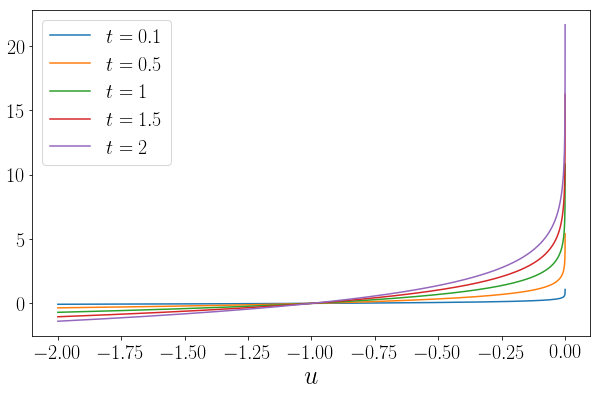

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import numpy as np

x = np.linspace(-2, 0, 100000, endpoint=False)
plt.figure(figsize=(10, 6))
for t in [0.1, 0.5, 1, 1.5, 2]:
    plt.plot(x, -t * np.log(-x), label=r"$t = " + str(t) + "$")
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
_ = plt.xlabel("$u$", fontsize=26)

### "Constrained" problem

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m -t \log(-f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}

- The problem is still **convex**
- Function 

$$
\phi(x) = -\sum\limits_{i=1}^m \log(-f_i(x))
$$ 

is called *logarithmic barier*. 

Its domain is a set of points such that the inequality constraints are strictly feasible.

**Exercise.** Find gradiebnt and hessian of $\phi(x)$

## Central path

For every $t > 0$ "constrained" problem has unique solution $x^*(t)$.

**Definition.** Sequence $x^*(t)$ for $t > 0$ is formed *central path*.

## Optimality conditions for "constrained" problem

- Primal feasibility

$$
Ax^*(t) = b, \; f_i(x^*) < 0, \; i = 1,\ldots,m
$$

- Lagrangian stationarity

\begin{equation*}
\begin{split}
& f'_0(x^*(t)) + \phi'(x^*(t)) + A^{\top}\hat{\mu} = \\
& = f'_0(x^*(t)) - t\sum_{i=1}^m \frac{f_i'(x^*(t))}{f_i(x^*(t))} + A^{\top}\hat{\mu} = 0
\end{split}
\end{equation*}

- Introduce the following notation

$$
\lambda^*_i(t) = -\frac{t}{f_i(x^*(t))} \; i=1,\ldots,m \text{ и } \mu^* = \hat{\mu}
$$

- Then optimality condition can be re-written as

$$
f'_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i'(x^*(t)) + A^{\top}\mu^* = 0
$$

- Then $x^*(t)$ is minimizer of the following Lagrangian

$$
L = f_0(x) + \sum_{i=1}^m \lambda_if_i(x) + \mu^{\top}(Ax - b)
$$

where $\lambda = \lambda^*(t)$ and $\mu = \mu^*$.

### Duality gap

- Dual function $g(\lambda^*(t), \mu^*)$ is finite and is represented in the following way
\begin{equation*}
\begin{split}
g(\lambda^*(t), \mu^*) & = f_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i(x^*(t)) + (\mu^*)^{\top}(Ax^*(t) - b)\\
& = f_0(x^*(t)) - mt
\end{split}
\end{equation*}

- Duality gap

$$
f_0(x^*(t)) - p^* \leq mt
$$

- While $t \to 0$ duality gap is 0 and central path converges to the solution of the original problem

## KKT interpretation

Optimality conditions for "constrained" problem is equivalent to optimality conditions for original problem if

$$
-\lambda_i f_i(x) = 0 \Rightarrow - \lambda_i f_i(x) = t \quad i = 1,\ldots, m
$$

## Physical interpretation

- Assume that we do not have equality constraints 
- Consider classical particle in the field of forces
- Every constraint $f_i(x) \leq 0$ corresponds to the following force

$$
F_i(x) = -\nabla(-\log(-f_i(x))) = \frac{f'_i(x)}{f_i(x)}
$$

- Objective function corresponds to some force, too

$$
F_0(x) = -\frac{f'_0(x)}{t}
$$

- Every point from the central path $x^*(t)$ is a equilibrium state of particle where sum of forces is zero
- While decreasing $t$ forces $F_0(x)$ dominates forces $F_i(x)$ and particle aims to get state which corresponding to optimal value of objective
- As far as forces $F_i(x)$ go to infinity when particle is close to the bounds, particle will never leave feasible region

## Barier method

- $x_0$ has to be feasible
- $t_0 > 0$ is initial value of parameter
- $\alpha \in (0, 1)$ is multiplier for decreasing $t_0$

```python
def BarrierMethod(f, x0, t0, tol, alpha, **kwargs):
    
    x = x0
    
    t = t0
    
    while True:
        
        x = SolveBarrierProblem(f, t, x, **kwargs)
        
        if m * t < tol:
            
            break
            
        t *= alpha
        
    return x

```

### Parameters selection

- Multiplier $\alpha$
    - In the case of $\alpha \sim 1$, "constrained" problem is solved after **small** number of iterations, but central path consists of **large** number of points
    - In the case $\alpha \sim 10^{-5}$ the situation is completely different: **large** number of iterations for solving "constrained" problems, but **small** number of points for central path
- Initialization $t_0$
    - Alternatives are similar to parameter $\alpha$
    - Parameter $t_0$ affects the initial point in central path

### Almost convergence theorem

- As it was shown above, while $t \to 0$ barrier method converges to the solution of the original problem
- Convergence speed is directly affected by parameters $\alpha$ and $t_0$, as was shown above
- The main difficulty is fast solving auxilliary problems with Newton methods

## Problem of finding feasible starting point

- Barier method requires feasible starting point
- Method is splitted in two phases
    - The first phase gives feasible starting point
    - The second phase uses this starting point to run barier method

### The first phase method

Simple method to find strictly feasible point

\begin{equation*}
\begin{split}
& \min s\\
\text{s.t. } & f_i(x) \leq s\\
& Ax = b
\end{split}
\end{equation*}

- this problem always has strictly feasible starting point
- if $s^* < 0$, then $x^*$ is strictly feasible and can be used in barier method
- if $s^* > 0$, then original problem is infeasible and feasible set is empty

### Sum of inconsistencies

\begin{equation*}
\begin{split}
& \min s_1 + \ldots + s_m\\
\text{s.t. } & f_i(x) \leq s_i\\
& Ax = b\\
& s \geq 0
\end{split}
\end{equation*}

- optimal objective value is 0 and it attains in the case of consistency of inequality constraints
- if the problem is infeasible, it is possible to identify what constraints are violated, i.e. $s_i > 0$ 

### Second phase

- After starting point $x_0$ is found, one can run standard Newton method for equality constrained problem

## Primal-dual method

It is similar to barier method, but
- every iteration updates both primal and dual variables
- Newton direction is taken from the modified KKT system
- iterands in primal-dual method may be not feasible
- it works even if the problem is not strictly feasible

## Recap

- Newton method for convex optimization problem with equality constraint
- The case of infeasible initial point
- Primal barier method
- Primal-dual method